# Car Price Prediction Project (Part III - Outlier Management & Data Standardization)

**Continuing from Part II:**

In the preceding phase, "Handling Missing Values & Feature Refinement," we significantly enhanced the dataset by intelligently imputing missing information and transforming raw features into more analytically useful representations. We delved into domain-specific knowledge to guide these imputations and feature engineering efforts, resulting in a dataset with 28,630 observations and 30 refined columns, poised for further scrutiny.

**Notebook Objective (Part III):**

This notebook addresses the crucial stage of **outlier detection and management**, alongside **final feature standardization**, ensuring the dataset is robust and reliable for model development. Outliers can disproportionately influence statistical analyses and machine learning models, leading to skewed results or poor generalization. Therefore, this phase focuses on identifying such data points using statistical methods, visualizations, and domain expertise, and then applying appropriate treatments. Furthermore, we finalize the standardization of certain features and address any new missing values that arose from these transformations, culminating in a dataset that closely mirrors real-world car market characteristics.

**Key Activities & Insights Gained in this Phase:**

*   **Comprehensive Outlier Detection & Treatment:**
    *   Visual inspection of feature distributions (e.g., `price`, `co2_emissions`, `fuel_consumption_comb`) using histograms and boxplots to identify extreme values.
    *   Bivariate analysis through scatter plots (e.g., `price` vs. `mileage`, `hp`, `engine_size_lt`, `empty_weight`) to spot data points deviating significantly from expected trends or physical plausibility (like near-zero `empty_weight` or astronomically high `co2_emissions`).
    *   Leveraging domain knowledge to assess the realism of potential outliers (e.g., typical horsepower ranges, maximum plausible previous owners, realistic fuel consumption figures for different `fuel_type`s). Decisions were made to cap, transform, or remove outliers based on whether they represented data errors or genuinely extreme (but valid) vehicle characteristics.
*   **Feature Standardization & Refinement:**
    *   Final standardization of categorical features like `emission_class` based on `registration_year` and known Euro standard timelines, ensuring consistency.
    *   Categorical features like `upholstery` were simplified by grouping less frequent or similar categories to reduce dimensionality while retaining predictive power (e.g., grouping upholstery into 'Cloth', 'Leather').
*   **Handling Consequential Missing Values:** The process of outlier treatment or complex standardization sometimes re-introduces null values; these were systematically addressed to maintain data integrity.
*   **Duplicate Removal:** A significant number of duplicate entries (4,135) were identified and removed, ensuring each observation is unique and preventing bias in modeling.
*   **Price Relationship Exploration:** Continued examination of each feature's relationship with the target variable `price` to solidify understanding of potential predictors and their characteristics (e.g., the non-linear relationship of `cylinders` with average `price`, or the varied price points for common `engine_size_lt` values depending on `make`).
*   **Dataset Finalization:** Through these meticulous steps, the dataset was refined to **23,858 clean and robust observations across 26 well-defined columns**. This careful reduction prioritized data quality and relevance for predicting car prices.

The outcome of this phase is a highly polished dataset, rigorously cleaned of problematic outliers and inconsistencies. The features are now in a state that more accurately reflects plausible real-world car data, providing a solid and reliable foundation for the subsequent stages of Exploratory Data Analysis (EDA), feature scaling, encoding, and the development of our car price prediction model.

In [73]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

In [74]:
df0 = pd.read_csv("car_project_part2.csv")
df = df0.copy()

In [75]:
df.head()

,price,make,make_model,body_type,type,doors,warranty,mileage,gearbox,fuel_type,color,paint,seller,seats,gears,co2_emissions,drivetrain,cylinders,empty_weight,emission_class,upholstery,previous_owner,registration_year,hp,engine_size_lt,fuel_consumption_comb,comfort_package,media_package,safety_package,extras_package
0,16950.0,Mercedes-Benz,Mercedes-Benz A 160,Compact,Used,5.0,Yes,120200.0,Manual,Diesel,Black,Metallic,Dealer,5.0,5.0,98.0,Front,4.0,1345.0,Euro 6,Cloth,2.0,2016.0,90.0,1.5,3.8,Deluxe,Premium,Deluxe,Standard
1,80900.0,Mercedes-Benz,Mercedes-Benz EQE 350,Compact,Pre-registered,4.0,Yes,5000.0,Automatic,Electric,Black,Uni/basic,Dealer,5.0,9.0,0.0,4WD,0.0,2355.0,Euro 6,Part Leather,0.0,2022.0,292.0,1.0,0.0,Standard,Premium,Standard,Premium
2,69900.0,Mercedes-Benz,Mercedes-Benz A 45 AMG,Compact,Used,5.0,Yes,18900.0,Automatic,Benzine,Grey,Uni/basic,Dealer,5.0,8.0,187.5,4WD,4.0,1535.0,Euro 6,Alcantara,2.0,2020.0,421.0,2.0,8.4,Standard,Standard,Standard,Standard
3,46990.0,Mercedes-Benz,Mercedes-Benz A 35 AMG,Compact,Used,5.0,Yes,18995.0,Automatic,Benzine,Yellow,Uni/basic,Dealer,5.0,7.0,169.0,4WD,4.0,1455.0,Euro 6,Full Leather,2.0,2020.0,306.0,2.0,7.3,Standard,Standard,Standard,Standard
4,16800.0,Mercedes-Benz,Mercedes-Benz A 45 AMG,Compact,Used,5.0,Yes,197000.0,Automatic,Diesel,White,Metallic,Dealer,5.0,7.0,127.0,4WD,4.0,1545.0,Euro 6,Alcantara,2.0,2015.0,136.0,2.1,4.9,Standard,Standard,Standard,Standard


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28630 entries, 0 to 28629
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  28630 non-null  float64
 1   make                   28630 non-null  object 
 2   make_model             28630 non-null  object 
 3   body_type              28630 non-null  object 
 4   type                   28630 non-null  object 
 5   doors                  28630 non-null  float64
 6   warranty               28630 non-null  object 
 7   mileage                28630 non-null  float64
 8   gearbox                28630 non-null  object 
 9   fuel_type              28630 non-null  object 
 10  color                  28630 non-null  object 
 11  paint                  28630 non-null  object 
 12  seller                 28630 non-null  object 
 13  seats                  28630 non-null  float64
 14  gears                  28630 non-null  float64
 15  co

In [77]:
df.duplicated().sum()

4134

In [78]:
## Dropping duplicates

df.drop_duplicates(inplace=True)

df = df.reset_index(drop=True)

In [79]:
df.shape

(24496, 30)

In [80]:
def check_type_integrity(df):
    for col in df.columns:
        non_null = df[col].dropna()
        types_found = non_null.map(type).value_counts()
        if len(types_found) > 1:
            print(f"⚠️ Column '{col}' has mixed types: {types_found.to_dict()}")
        else:
            print(f"✅ Column '{col}' has consistent type: {types_found.index[0].__name__}")

check_type_integrity(df)

✅ Column 'price' has consistent type: float
✅ Column 'make' has consistent type: str
✅ Column 'make_model' has consistent type: str
✅ Column 'body_type' has consistent type: str
✅ Column 'type' has consistent type: str
✅ Column 'doors' has consistent type: float
✅ Column 'warranty' has consistent type: str
✅ Column 'mileage' has consistent type: float
✅ Column 'gearbox' has consistent type: str
✅ Column 'fuel_type' has consistent type: str
✅ Column 'color' has consistent type: str
✅ Column 'paint' has consistent type: str
✅ Column 'seller' has consistent type: str
✅ Column 'seats' has consistent type: float
✅ Column 'gears' has consistent type: float
✅ Column 'co2_emissions' has consistent type: float
✅ Column 'drivetrain' has consistent type: str
✅ Column 'cylinders' has consistent type: float
✅ Column 'empty_weight' has consistent type: float
✅ Column 'emission_class' has consistent type: str
✅ Column 'upholstery' has consistent type: str
✅ Column 'previous_owner' has consistent type

## Handling Outliers

In [82]:
def distribution_plot(col, df, bins=100):
    """
    Plot histogram and boxplot for a given column from a DataFrame.
    
    Parameters:
        col (str): Column name to plot.
        df (pd.DataFrame): The DataFrame containing the column.
        bins (int): Number of bins for the histogram.
    """
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in DataFrame.")
    
    if not pd.api.types.is_numeric_dtype(df[col]):
        raise TypeError(f"Column '{col}' must be numeric to plot distributions.")

    fig, ax = plt.subplots(2, 1, figsize=(12, 6), height_ratios=[3, 1], sharex=True)

    sns.histplot(data=df, x=col, ax=ax[0], bins=bins, kde=True, color='skyblue', edgecolor='black')
    ax[0].set_title(f'Distribution of {col}')
    ax[0].grid(True)

    sns.boxplot(data=df, x=col, ax=ax[1], color='lightcoral')
    ax[1].set_title(f'Boxplot of {col}')
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

### price

In [84]:
df.price.describe().map('{:.2f}'.format)

count      24496.00
mean       23914.28
std        26588.23
min          490.00
25%        11900.00
50%        18700.00
75%        28490.00
max      1346900.00
Name: price, dtype: object

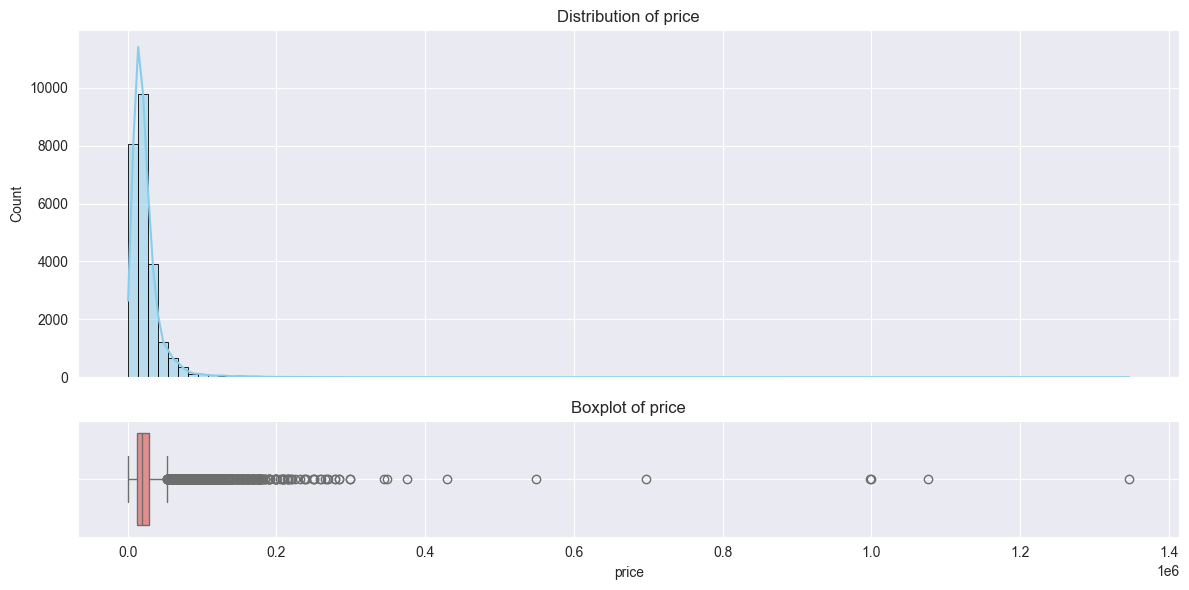

In [85]:
distribution_plot('price', df)

In [86]:
df[['make_model', 'price']].sort_values(by='price', ascending=False).head(20)

,make_model,price
19825,Ford GT,1346900.0
19813,Ford GT,1075900.0
24068,Volvo 240,999999.0
19923,Ford GT,998000.0
1176,Mercedes-Benz G 63 AMG,696900.0
19589,Ford GT,549000.0
19642,Ford GT,430000.0
1279,Mercedes-Benz G 63 AMG,375900.0
19931,Ford RS2000,349000.0
1267,Mercedes-Benz G 63 AMG,344900.0


In [87]:
df.loc[df[df.price > 300000].index, 'price'] = np.nan

In [88]:
df[['make_model', 'price']].sort_values(by='price', ascending=False).tail(20)

,make_model,price
5287,Renault Megane,740.0
21638,Hyundai ACCENT,700.0
3196,Opel Astra,700.0
5069,Renault Megane,699.0
5064,Renault Megane,600.0
5120,Renault Megane,600.0
16067,Toyota Paseo,590.0
5281,Renault Megane,500.0
17723,Nissan 100 NX,500.0
5610,Renault Megane,490.0


In [89]:
df['price'] = df['price'].fillna(
    df.groupby(['make_model', 'body_type'])['price'].transform(lambda x: x.mean()))

In [90]:
df.drop(df[df.price.isnull()].index, axis=0, inplace=True)

### doors

In [92]:
df.doors.describe().map('{:.1f}'.format)

count    24495.0
mean         4.1
std          1.2
min          2.0
25%          3.0
50%          5.0
75%          5.0
max          5.0
Name: doors, dtype: object

In [93]:
df.doors.value_counts()

doors
5.0    14714
2.0     4876
4.0     2753
3.0     2152
Name: count, dtype: int64

In [94]:
## Standardizing the number of doors for each car models with certain body types.

df['unique_cars'] = df.make_model + ' ' + df.body_type

def get_first_mode(series):
    mode = series.mode()
    if not mode.empty:
        return mode[0]
    return np.nan

df['doors'] = df.groupby('unique_cars')['doors'].transform(get_first_mode)

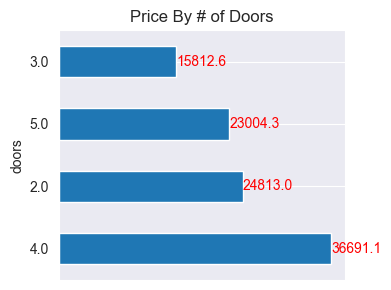

In [95]:
ax = df.groupby('doors')['price'].mean().sort_values(ascending=False).plot(kind='barh',
                                                            figsize=(4,3), xticks=[],
                                                            title='Price By # of Doors')
plt.bar_label(ax.containers[0], fmt='%.1f', color='red')
plt.tight_layout()
plt.show()

### mileage

In [97]:
df.mileage.describe().map('{:.2f}'.format)

count      24495.00
mean       71034.79
std        67865.44
min            0.00
25%        19300.00
50%        54700.00
75%       104500.00
max      1440000.00
Name: mileage, dtype: object

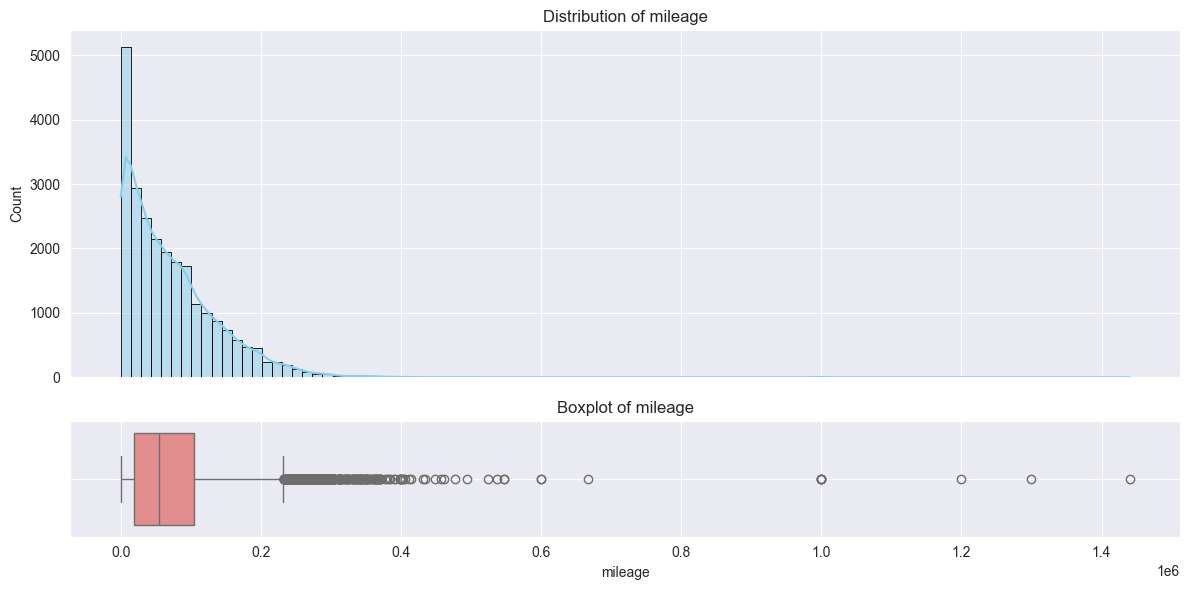

In [98]:
distribution_plot('mileage', df)

In [99]:
df.mileage.sort_values(ascending=False).head(20)

17181    1440000.0
15878    1300000.0
11349    1199900.0
20869    1000001.0
7322     1000000.0
9548      999999.0
19382     999999.0
3218      999999.0
12291     667128.0
24344     600001.0
13391     600000.0
16406     547000.0
13405     546888.0
3039      536388.0
16762     523992.0
3276      494457.0
18229     477000.0
6240      461626.0
271       457379.0
24116     448914.0
Name: mileage, dtype: float64

In [100]:
df.loc[df[df.mileage >= 600000].index, 'mileage'] = np.nan

In [101]:
df['mileage'] = df['mileage'].fillna(
    df.groupby(['type', 'registration_year', 'previous_owner'])['mileage'].transform(lambda x: x.mean()))

In [102]:
df.loc[df[df.mileage.isnull()].index, 'mileage'] = round(df[df.type == 'Used'].mileage.mean())

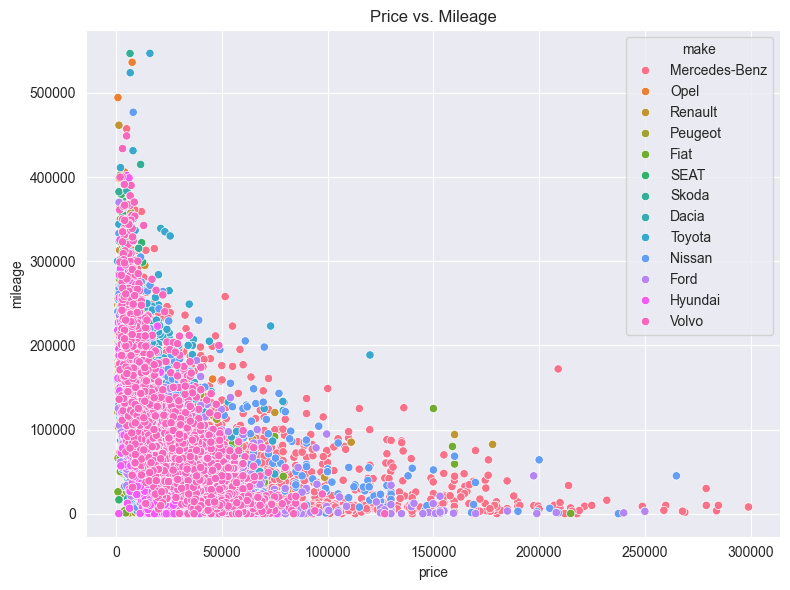

In [103]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='price', y='mileage', hue='make')
plt.title('Price vs. Mileage')

plt.tight_layout()
plt.show()

In [104]:
df[(df.mileage > 150000) & (df.price > 200000)]

,price,make,make_model,body_type,type,doors,warranty,mileage,gearbox,fuel_type,color,paint,seller,seats,gears,co2_emissions,drivetrain,cylinders,empty_weight,emission_class,upholstery,previous_owner,registration_year,hp,engine_size_lt,fuel_consumption_comb,comfort_package,media_package,safety_package,extras_package,unique_cars
588,209000.0,Mercedes-Benz,Mercedes-Benz G 500,Convertible,Used,3.0,Unknown,172000.0,Automatic,Benzine,Black,Metallic,Dealer,5.0,7.0,400.0,4WD,8.0,2350.0,Euro 4,Full Leather,2.0,1999.0,296.0,5.0,16.7,Premium,Standard,Standard,Standard,Mercedes-Benz G 500 Convertible


### seats

In [106]:
df.seats.value_counts()

seats
5.0    17631
4.0     5159
2.0     1135
7.0      446
8.0       45
9.0       35
3.0       30
6.0       14
Name: count, dtype: int64

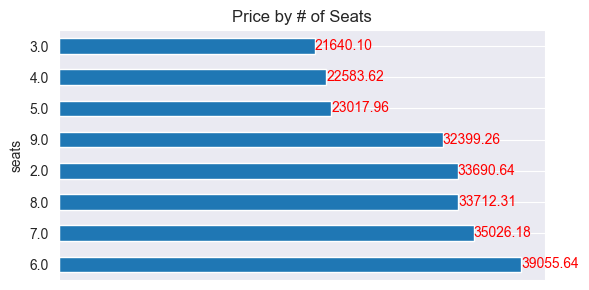

In [107]:
ax = df.groupby('seats')['price'].mean().sort_values(ascending=False).plot(kind='barh',
                                                            figsize=(6,3), xticks=[],
                                                                title='Price by # of Seats')
plt.bar_label(ax.containers[0], fmt='%.2f', color='red')
plt.tight_layout()
plt.show()

### gears

In [109]:
df.gears.value_counts()

gears
6.0     10453
5.0      6451
7.0      2560
8.0      1979
1.0      1266
9.0      1108
4.0       390
10.0      288
Name: count, dtype: int64

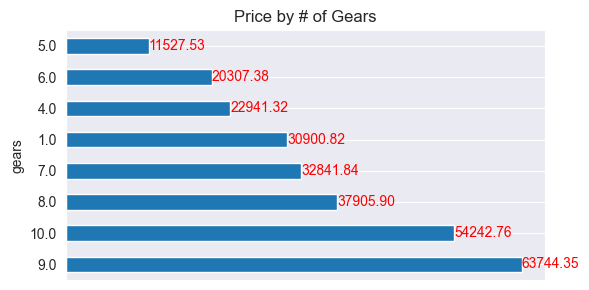

In [110]:
ax = df.groupby('gears')['price'].mean().sort_values(ascending=False).plot(kind='barh',
                                                            figsize=(6,3), xticks=[],
                                                                title='Price by # of Gears')
plt.bar_label(ax.containers[0], fmt='%.2f', color='red')
plt.tight_layout()
plt.show()

### co2_emissions

In [112]:
df.co2_emissions.describe().map('{:.2f}'.format)

count    24495.00
mean       140.61
std        140.11
min          0.00
25%        109.00
50%        128.00
75%        161.00
max      15168.00
Name: co2_emissions, dtype: object

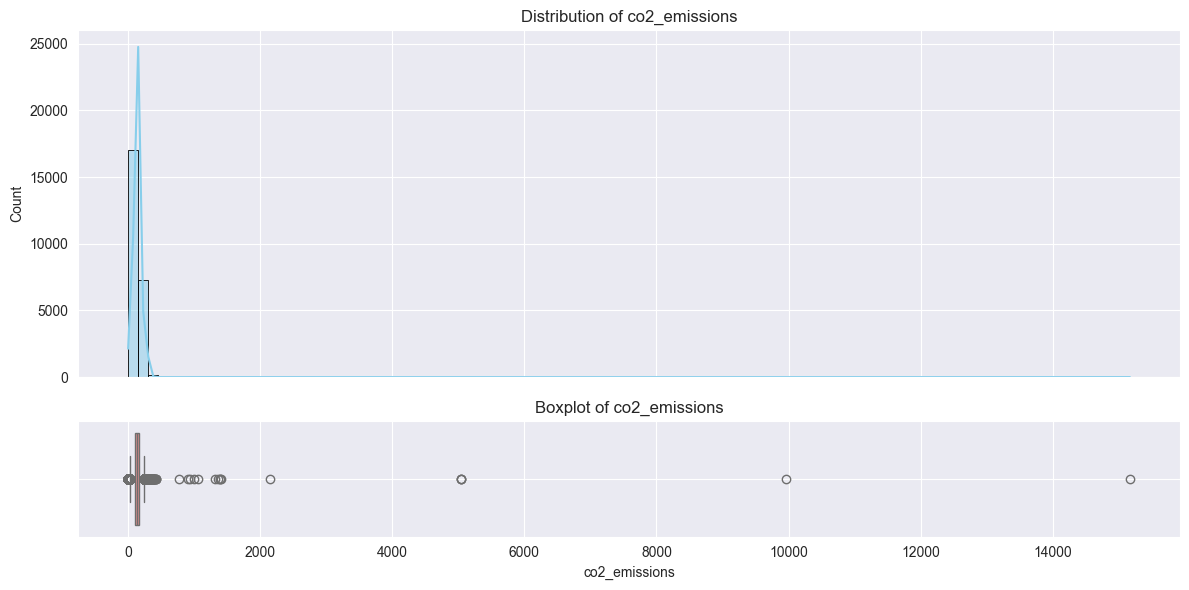

In [113]:
distribution_plot('co2_emissions', df)

In [114]:
df.co2_emissions.sort_values(ascending=False).head(20)

9450     15168.0
18934     9954.0
19180     5034.5
18912     5034.5
18953     5034.5
7534      2155.0
16537     1410.0
9683      1390.0
9702      1390.0
4348      1360.0
11006     1320.0
8843      1060.0
23358     1000.0
20012      940.0
18846      910.0
16474      776.5
19856      420.0
19667      420.0
19927      420.0
23778      414.0
Name: co2_emissions, dtype: float64

Based on the domain knowledge, co2 emissions of a typical car should be between **70 to 420 g/km**.

In [116]:
df.loc[df[df.co2_emissions > 420].index, 'co2_emissions'] = np.nan

In [117]:
df.loc[df[(df.co2_emissions < 70) & (df.co2_emissions > 0)].index, 'co2_emissions'] = np.nan

In [118]:
df['co2_emissions'] = df['co2_emissions'].fillna(
    df.groupby(['make_model', 'body_type', 'fuel_type', 
                'emission_class', 'registration_year'])['co2_emissions'].transform(lambda x: x.mean()))

In [119]:
df['co2_emissions'] = df['co2_emissions'].fillna(
    df.groupby(['make_model', 'body_type', 'fuel_type', 
                'emission_class'])['co2_emissions'].transform(lambda x: x.mean()))

In [120]:
df['co2_emissions'] = df['co2_emissions'].fillna(
    df.groupby(['make_model', 'fuel_type',
                'emission_class'])['co2_emissions'].transform(lambda x: x.mean()))

In [121]:
df['co2_emissions'] = df['co2_emissions'].fillna(
    df.groupby(['make_model', 'body_type',
                'emission_class'])['co2_emissions'].transform(lambda x: x.mean()))

In [122]:
df['co2_emissions'] = df['co2_emissions'].fillna(
    df.groupby(['make_model',
                'body_type'])['co2_emissions'].transform(lambda x: x.mean()))

In [123]:
df['co2_emissions'] = df['co2_emissions'].fillna(
    df.groupby(['make',
                'fuel_type'])['co2_emissions'].transform(lambda x: x.mean()))

### cylinders

In [125]:
df.cylinders.value_counts()

cylinders
4.0     16540
3.0      4607
6.0      1322
8.0       851
5.0       532
0.0       497
2.0       133
12.0       13
Name: count, dtype: int64

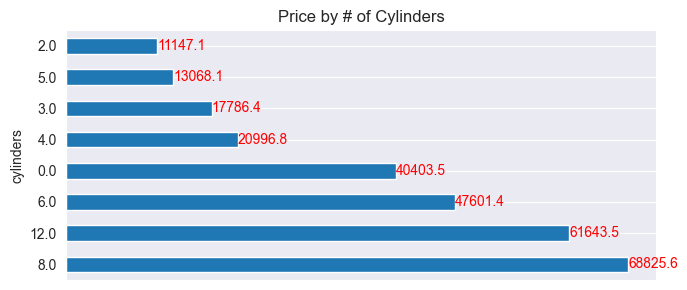

In [126]:
ax = df.groupby('cylinders')['price'].mean().sort_values(ascending=False).plot(kind='barh',
                                                            figsize=(7,3), xticks=[],
                                                                title='Price by # of Cylinders')
plt.bar_label(ax.containers[0], fmt='%.1f', color='red')
plt.tight_layout()
plt.show()

### empty_weight

In [128]:
df.empty_weight.describe().map('{:.2f}'.format)

count    24495.00
mean      1419.36
std        324.24
min          0.00
25%       1207.75
50%       1381.50
75%       1595.00
max      15590.00
Name: empty_weight, dtype: object

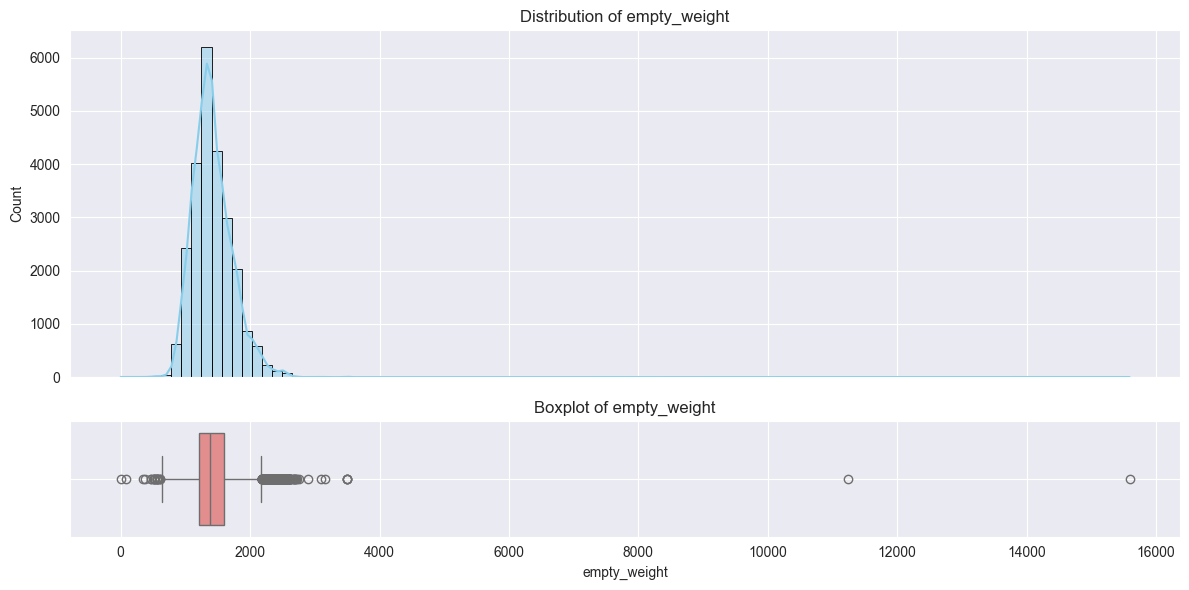

In [129]:
distribution_plot('empty_weight', df)

In [130]:
df[['empty_weight', 'make_model', 'price']].sort_values(by='empty_weight').head(20)

,empty_weight,make_model,price
12578,0.0,SEAT Leon,21700.0
13047,75.0,Skoda Enyaq,74490.0
5920,347.0,Renault Twizy,7445.0
5958,375.0,Renault Twizy,7950.0
4664,473.0,Renault Twizy,10390.0
5551,474.0,Renault Twizy,11999.0
5199,517.5,Renault Twizy,5900.0
4720,517.5,Renault Twizy,6490.0
4616,517.5,Renault Twizy,8990.0
4946,517.5,Renault Twizy,6500.0


In [131]:
df.loc[3983, 'empty_weight'] = 1350.0
df.loc[df.empty_weight.sort_values().head(2).index, 'empty_weight'] = np.nan

In [132]:
df.loc[df[df.empty_weight >= 3500].index, 'empty_weight'] = np.nan

In [133]:
df['empty_weight'] = df['empty_weight'].fillna(
    df.groupby(['make_model', 'body_type', 'drivetrain'])['empty_weight'].transform(lambda x: x.mean()))

In [134]:
df['empty_weight'] = df['empty_weight'].fillna(
    df.groupby(['make_model', 'body_type'])['empty_weight'].transform(lambda x: x.mean()))

In [135]:
df.loc[df[df.empty_weight.isnull()].index, 'empty_weight'] = 2625.0

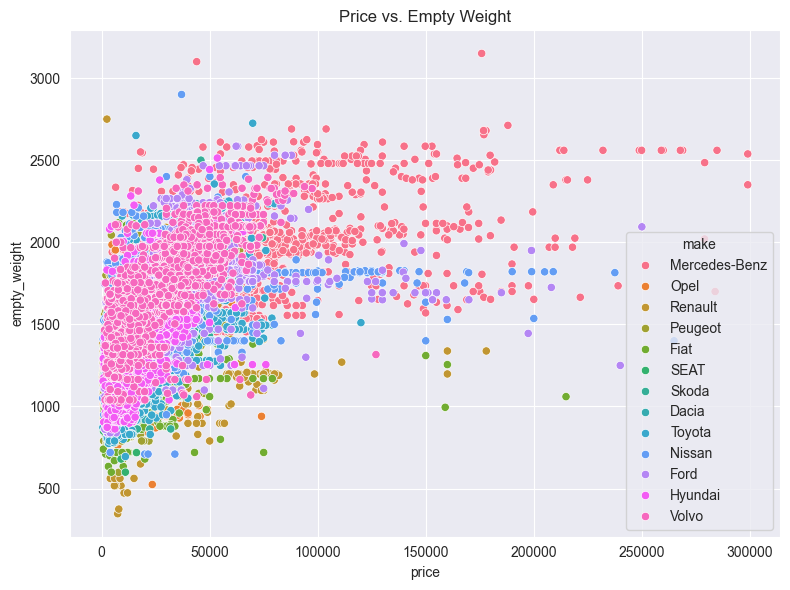

In [136]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='price', y='empty_weight', hue='make')
plt.title('Price vs. Empty Weight')

plt.tight_layout()
plt.show()

### emission_class

In [138]:
## Standardizing emission class based on the registration year

df.loc[df[(df.registration_year >= 1992) & (df.registration_year < 1996)].emission_class.index, 'emission_class'] = 'Euro 1'
df.loc[df[(df.registration_year >= 1996) & (df.registration_year < 2000)].emission_class.index, 'emission_class'] = 'Euro 2'
df.loc[df[(df.registration_year >= 2000) & (df.registration_year < 2005)].emission_class.index, 'emission_class'] = 'Euro 3'
df.loc[df[(df.registration_year >= 2005) & (df.registration_year < 2009)].emission_class.index, 'emission_class'] = 'Euro 4'
df.loc[df[(df.registration_year >= 2009) & (df.registration_year < 2014)].emission_class.index, 'emission_class'] = 'Euro 5'
df.loc[df[df.registration_year >= 2014].emission_class.index, 'emission_class'] = 'Euro 6'

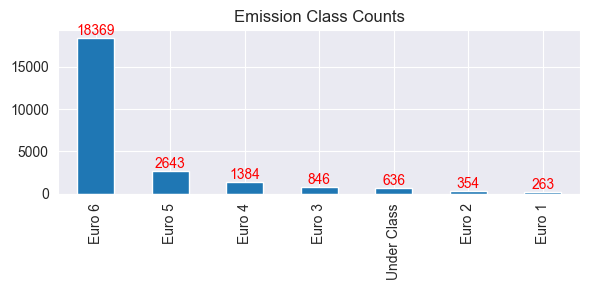

In [139]:
ax = df.emission_class.value_counts().plot(kind='bar', title='Emission Class Counts', figsize=(6,3), xlabel = '')
plt.bar_label(ax.containers[0], color='red')

plt.tight_layout()
plt.show()

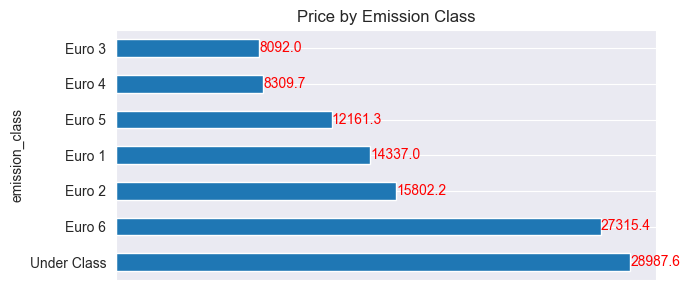

In [140]:
ax = df.groupby('emission_class')['price'].mean().sort_values(ascending=False).plot(kind='barh',
                                                            figsize=(7,3), xticks=[],
                                                                title='Price by Emission Class')
plt.bar_label(ax.containers[0], fmt='%.1f', color='red')
plt.tight_layout()
plt.show()

### previous_owner

In [142]:
df.previous_owner.value_counts()

previous_owner
1.0     16630
2.0      5432
3.0      1044
0.0       898
4.0       268
5.0       102
6.0        47
7.0        38
8.0        19
9.0        11
10.0        2
12.0        2
14.0        1
13.0        1
Name: count, dtype: int64

In [143]:
df.loc[df[df.previous_owner > 9].index, 'previous_owner'] = 9.0

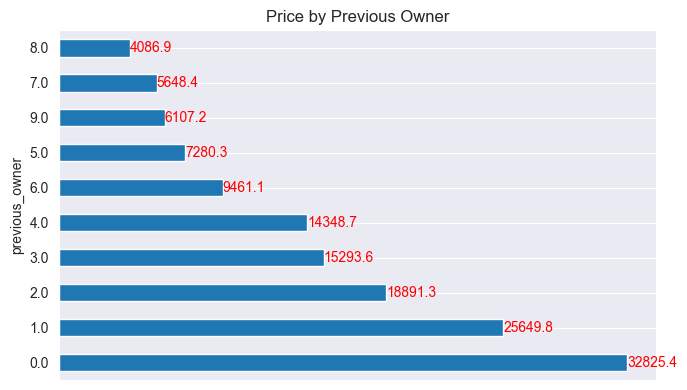

In [144]:
ax = df.groupby('previous_owner')['price'].mean().sort_values(ascending=False).plot(kind='barh',
                                                            figsize=(7,4), xticks=[],
                                                                title='Price by Previous Owner')
plt.bar_label(ax.containers[0], fmt='%.1f', color='red')
plt.tight_layout()
plt.show()

### registration_year

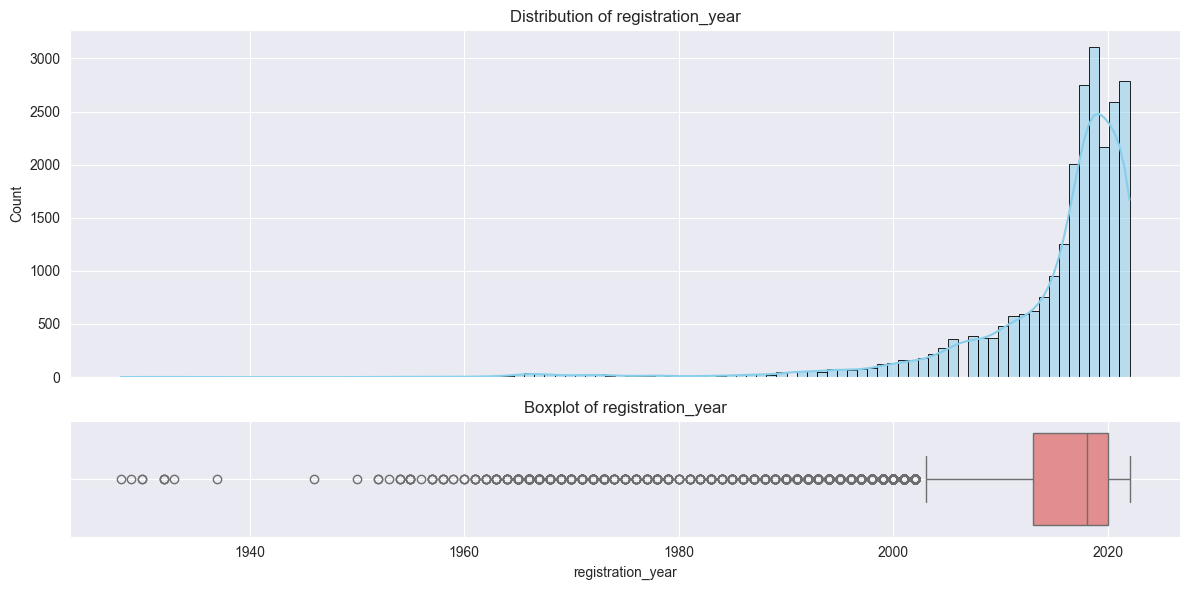

In [146]:
distribution_plot('registration_year', df)

In [147]:
df[df.registration_year < 1992].shape

(636, 31)

**Note:** Consider removing cars older than a certain registration year!

### horse power

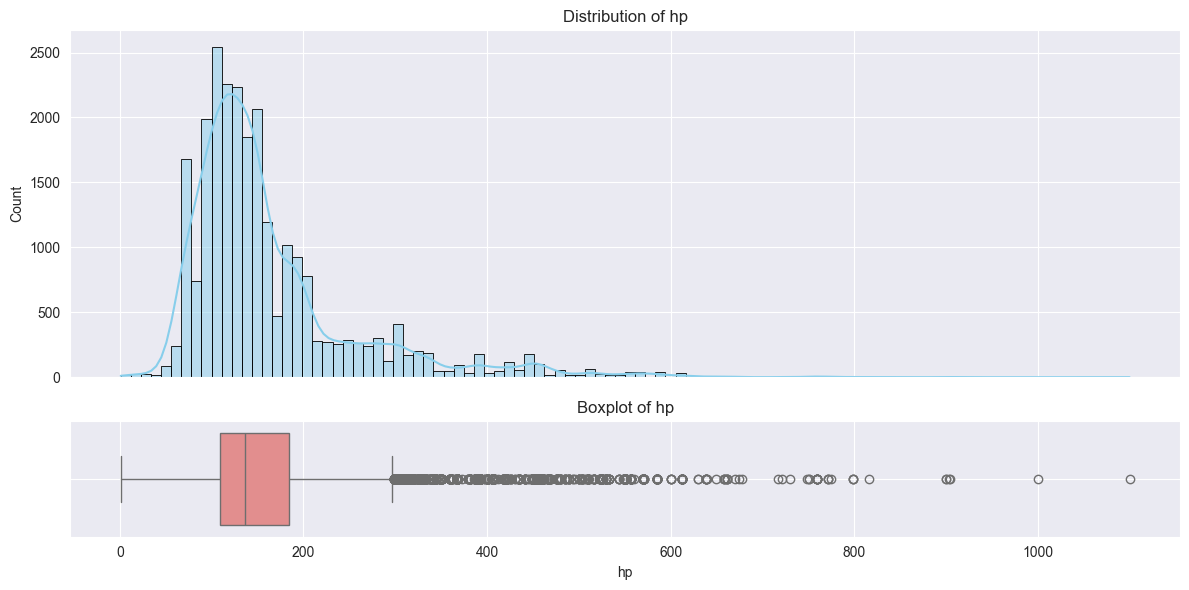

In [150]:
distribution_plot('hp', df)

In [151]:
df.loc[df[df.make_model == 'Renault Twizy'].index, 'hp'] = 17.0

In [152]:
null_index = df[(df.hp < 60) & (df.make_model != 'Renault Twizy') & (df.registration_year > 1991)].index

df.loc[null_index, 'hp'] = np.nan

In [153]:
df.loc[df[(df.hp > 600) & (df.registration_year > 1991)].index, 'hp'] = np.nan

In [154]:
df['hp'] = df['hp'].fillna(
    df.groupby(['make_model', 'body_type', 'drivetrain',
               'engine_size_lt', 'fuel_type'])['hp'].transform(lambda x: x.median()))

In [155]:
df['hp'] = df['hp'].fillna(
    df.groupby(['make_model', 'body_type', 'drivetrain',
               'fuel_type'])['hp'].transform(lambda x: x.median()))

In [156]:
df['hp'] = df['hp'].fillna(
    df.groupby(['make',
               'body_type', 'drivetrain', 'fuel_type'])['hp'].transform(lambda x: x.median()))

In [157]:
df['hp'] = df['hp'].fillna(
    df.groupby(['make_model', 'fuel_type'])['hp'].transform(lambda x: x.median()))

In [158]:
df['hp'] = df['hp'].fillna(
    df.groupby(['make', 'fuel_type'])['hp'].transform(lambda x: x.median()))

In [159]:
df['hp'] = df['hp'].fillna(
    df.groupby(['make', 'body_type'])['hp'].transform(lambda x: x.median()))

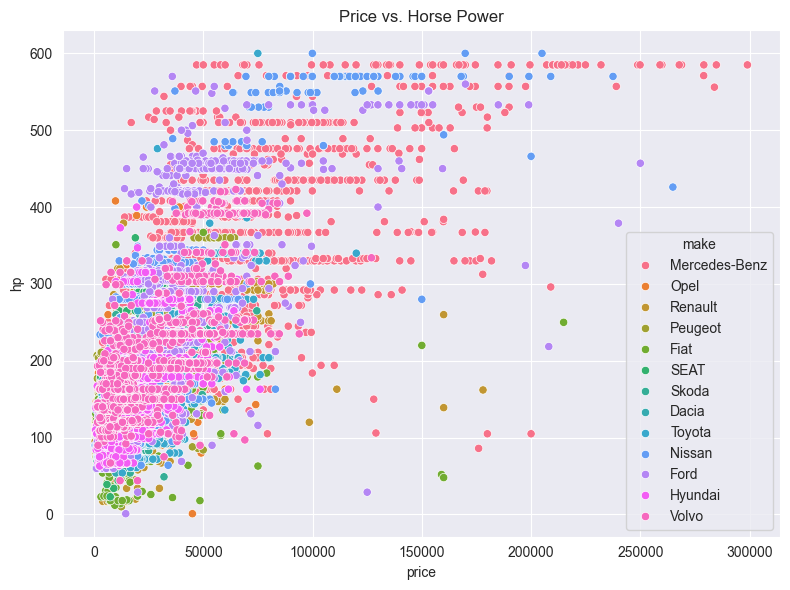

In [160]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='price', y='hp', hue='make')
plt.title('Price vs. Horse Power')

plt.tight_layout()
plt.show()

### engine size (lt)

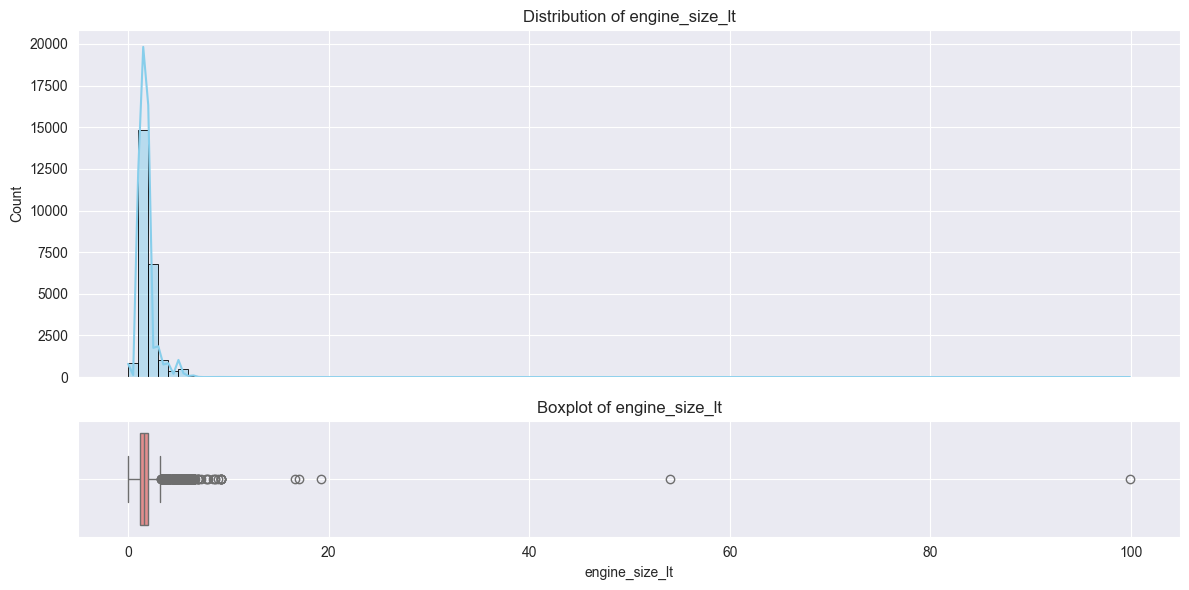

In [162]:
distribution_plot('engine_size_lt', df)

In [163]:
df.loc[df[df.engine_size_lt > 6].index, 'engine_size_lt'] = np.nan

In [164]:
df.loc[df[(df.engine_size_lt == 0) & (df.fuel_type != 'Electric')].index, 'engine_size_lt'] = np.nan

In [165]:
df.loc[df[(df.engine_size_lt > 0) & (df.engine_size_lt < 1)].index, 'engine_size_lt'] = np.nan

In [166]:
df['engine_size_lt'] = df['engine_size_lt'].fillna(
    df.groupby(['make_model', 'body_type', 'drivetrain',
               'fuel_type', 'fuel_consumption_comb'])['engine_size_lt'].transform(lambda x: x.median()))

In [167]:
df['engine_size_lt'] = df['engine_size_lt'].fillna(
    df.groupby(['make_model', 'body_type', 'drivetrain',
               'fuel_type'])['engine_size_lt'].transform(lambda x: x.median()))

In [168]:
df['engine_size_lt'] = df['engine_size_lt'].fillna(
    df.groupby(['make_model', 'body_type',
               'fuel_type'])['engine_size_lt'].transform(lambda x: x.median()))

In [169]:
df['engine_size_lt'] = df['engine_size_lt'].fillna(
    df.groupby(['make', 'body_type',
               'fuel_type'])['engine_size_lt'].transform(lambda x: x.median()))

In [170]:
df['engine_size_lt'] = df['engine_size_lt'].fillna(
    df.groupby(['make', 'body_type'])['engine_size_lt'].transform(lambda x: x.median()))

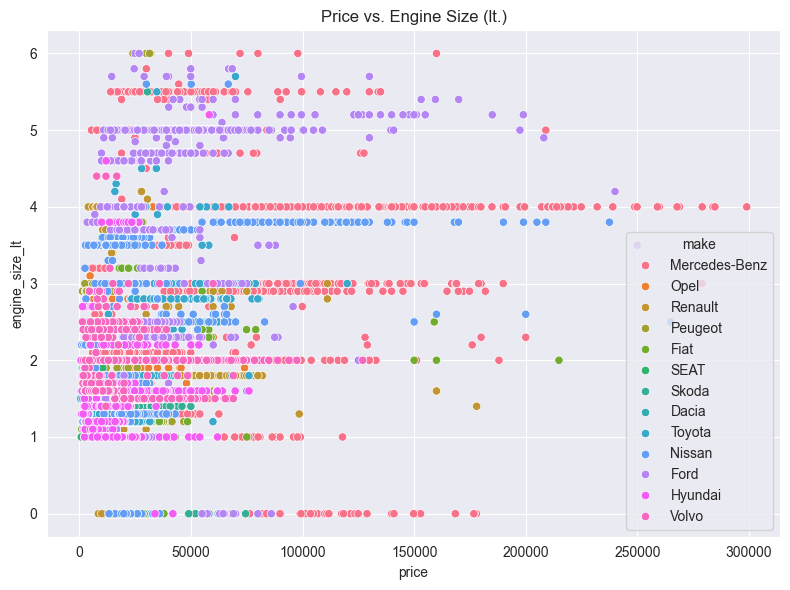

In [171]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='price', y='engine_size_lt', hue='make')
plt.title('Price vs. Engine Size (lt.)')

plt.tight_layout()
plt.show()

### fuel consumption

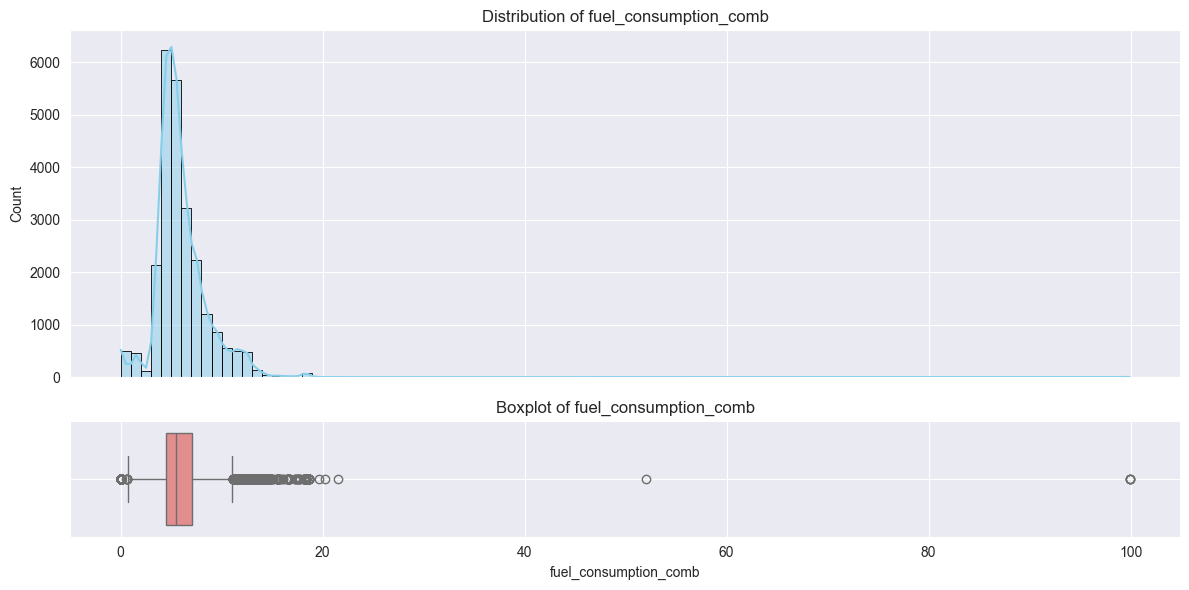

In [173]:
distribution_plot('fuel_consumption_comb', df)

In [174]:
df.loc[df[(df.fuel_consumption_comb > 0) & (df.fuel_consumption_comb < 3)].index, 'fuel_consumption_comb'] = np.nan

df.loc[df[df.fuel_consumption_comb > 15].index, 'fuel_consumption_comb'] = np.nan

In [175]:
df['fuel_consumption_comb'] = df['fuel_consumption_comb'].fillna(
    df.groupby(['make_model', 'body_type',
               'fuel_type', 'engine_size_lt'])['fuel_consumption_comb'].transform(lambda x: x.median()))

In [176]:
df['fuel_consumption_comb'] = df['fuel_consumption_comb'].fillna(
    df.groupby(['make_model', 'body_type',
               'fuel_type'])['fuel_consumption_comb'].transform(lambda x: x.median()))

In [177]:
df['fuel_consumption_comb'] = df['fuel_consumption_comb'].fillna(
    df.groupby(['make', 'body_type',
               'fuel_type'])['fuel_consumption_comb'].transform(lambda x: x.median()))

In [178]:
df['fuel_consumption_comb'] = df['fuel_consumption_comb'].fillna(
    df.groupby(['make_model',
               'fuel_type'])['fuel_consumption_comb'].transform(lambda x: x.median()))

In [179]:
df['fuel_consumption_comb'] = df['fuel_consumption_comb'].fillna(
    df.groupby(['make',
               'fuel_type'])['fuel_consumption_comb'].transform(lambda x: x.median()))

In [180]:
df['fuel_consumption_comb'] = df['fuel_consumption_comb'].fillna(
    df.groupby(['make',
               'body_type'])['fuel_consumption_comb'].transform(lambda x: x.median()))

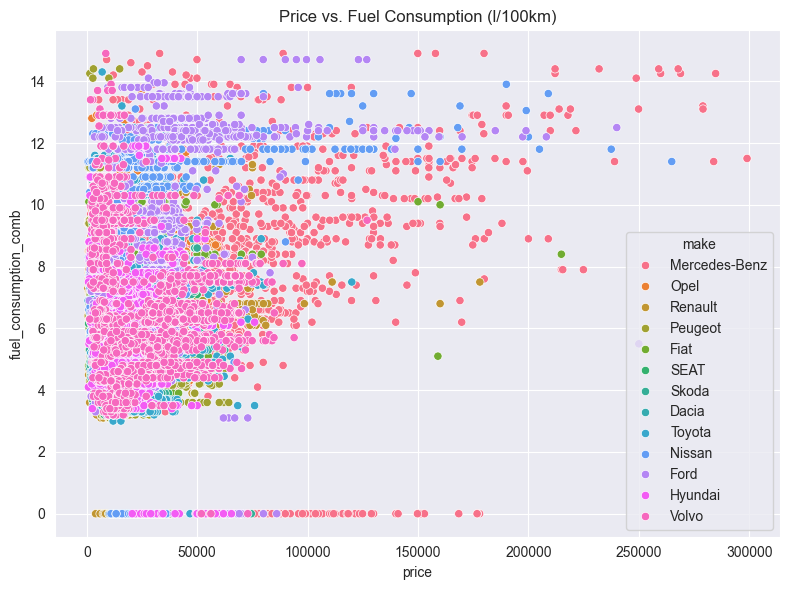

In [181]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='price', y='fuel_consumption_comb', hue='make')
plt.title('Price vs. Fuel Consumption (l/100km)')

plt.tight_layout()
plt.show()

### Categorical Columns

In [183]:
def plot_by_price(col, df, figsize=(5, 5)):
    
    # Group and calculate mean prices
    group = df.groupby(col)['price'].mean().sort_values(ascending=False)
    
    # Plot
    ax = group.plot(kind='barh', figsize=figsize, title=f'Mean Price by {col}', color='skyblue')
    ax.set_xlabel("Average Price (€)")
    ax.set_ylabel(col)

    # Format x-axis ticks
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

    # Add price labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', padding=3, color='darkred')

    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

**make**

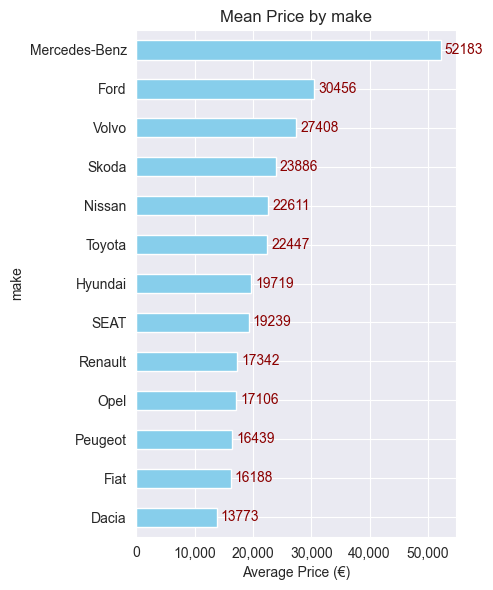

In [185]:
plot_by_price('make', df, (5,6))

**body_type**

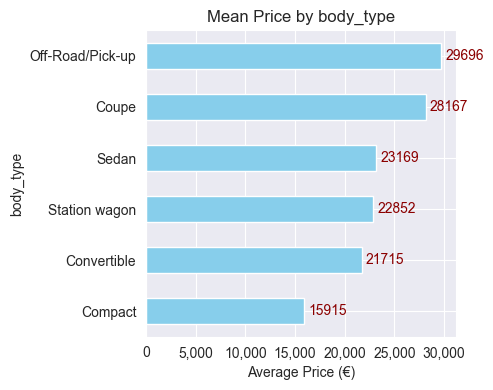

In [187]:
plot_by_price('body_type', df, (5,4))

**type**

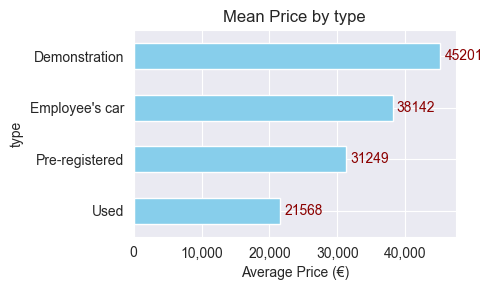

In [189]:
plot_by_price('type', df, (5,3))

**gearbox**

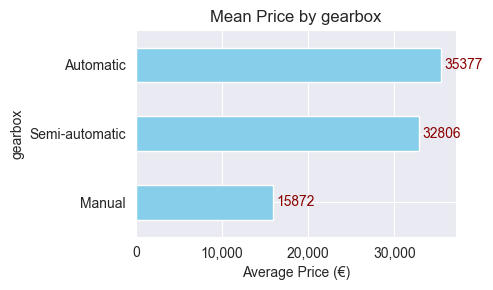

In [191]:
plot_by_price('gearbox', df, (5,3))

**fuel_type**

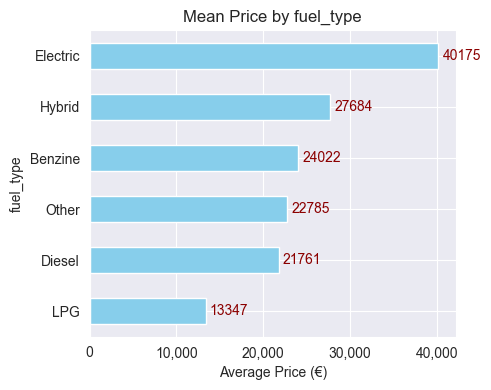

In [193]:
plot_by_price('fuel_type', df, (5,4))

**color**

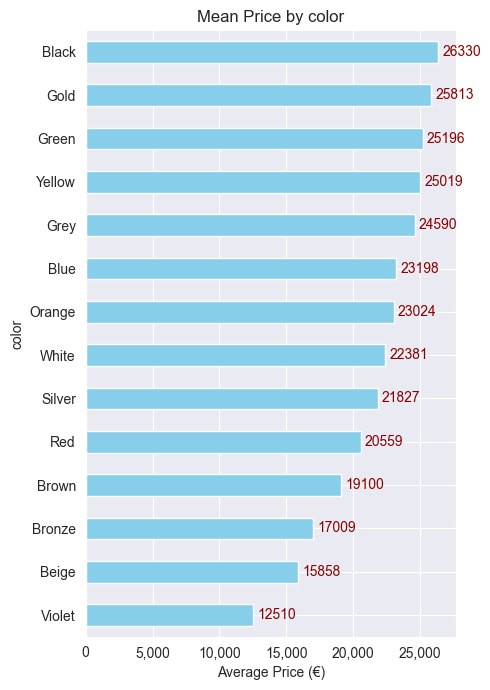

In [195]:
plot_by_price('color', df, (5,7))

**paint**

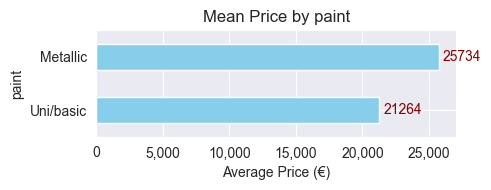

In [197]:
plot_by_price('paint', df, (5,2))

**seller**

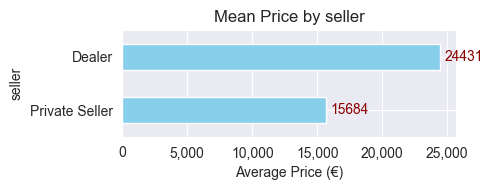

In [199]:
plot_by_price('seller', df, (5,2))

**drivetrain**

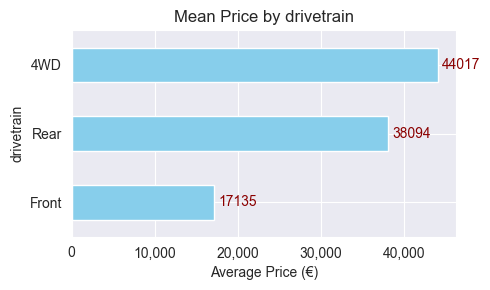

In [201]:
plot_by_price('drivetrain', df, (5,3))

**upholstery**

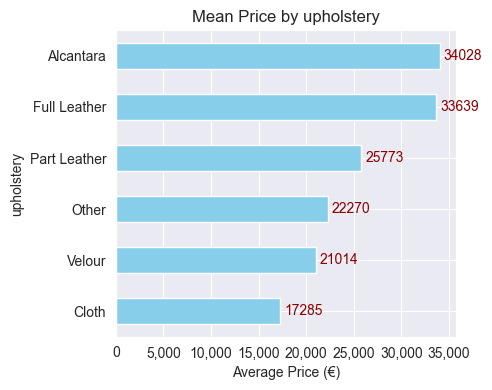

In [203]:
plot_by_price('upholstery', df, (5,4))

**comfort_package**

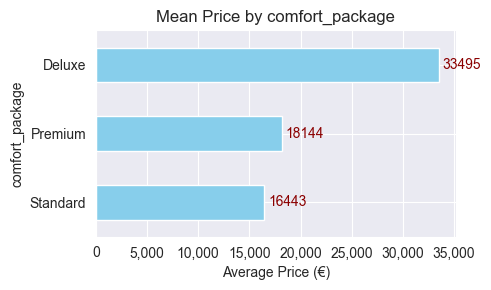

In [205]:
plot_by_price('comfort_package', df, (5,3))

**media_package**

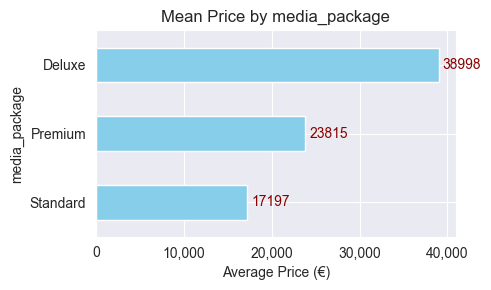

In [207]:
plot_by_price('media_package', df, (5,3))

**safety_package**

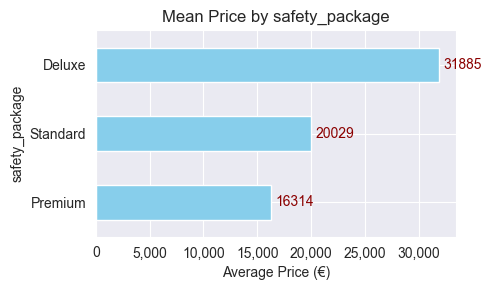

In [209]:
plot_by_price('safety_package', df, (5,3))

**extras_package**

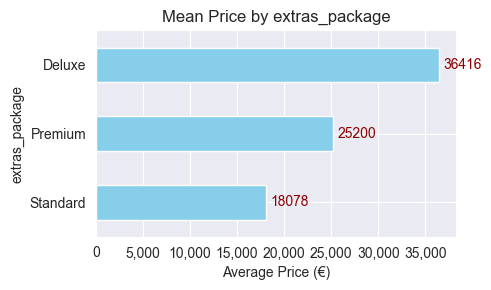

In [211]:
plot_by_price('extras_package', df, (5,3))

## Final Wrangling

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24495 entries, 0 to 24495
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  24495 non-null  float64
 1   make                   24495 non-null  object 
 2   make_model             24495 non-null  object 
 3   body_type              24495 non-null  object 
 4   type                   24495 non-null  object 
 5   doors                  24495 non-null  float64
 6   warranty               24495 non-null  object 
 7   mileage                24495 non-null  float64
 8   gearbox                24495 non-null  object 
 9   fuel_type              24495 non-null  object 
 10  color                  24495 non-null  object 
 11  paint                  24495 non-null  object 
 12  seller                 24495 non-null  object 
 13  seats                  24495 non-null  float64
 14  gears                  24495 non-null  float64
 15  co2_emi

In [214]:
## Creating Age column instead of Registration Year

df['age'] = 2022 - df.registration_year

In [215]:
## Simplifying Upholstery column

upholstery_map = {
    'Cloth': 'Cloth',
    'Velour': 'Cloth',
    'Full Leather': 'Leather',
    'Part Leather': 'Leather',
    'Alcantara': 'Alcantara',
    'Other': 'Other'
}
df['upholstery'] = df['upholstery'].map(upholstery_map)

In [216]:
## Dropping cars before 1992

df = df[df.registration_year >= 1992]

In [217]:
cols_to_drop = ['unique_cars', 'registration_year', 'emission_class', 'color', 'warranty', 'make']

df.drop(cols_to_drop, axis=1, inplace=True)

In [218]:
df.columns

Index(['price', 'make_model', 'body_type', 'type', 'doors', 'mileage',
       'gearbox', 'fuel_type', 'paint', 'seller', 'seats', 'gears',
       'co2_emissions', 'drivetrain', 'cylinders', 'empty_weight',
       'upholstery', 'previous_owner', 'hp', 'engine_size_lt',
       'fuel_consumption_comb', 'comfort_package', 'media_package',
       'safety_package', 'extras_package', 'age'],
      dtype='object')

In [219]:
df.columns = ['price', 'make_model', 'body_type', 'type', 'doors', 'mileage',
       'gearbox', 'fuel_type', 'paint', 'seller', 'seats', 'gears',
       'co2_emissions', 'drivetrain', 'cylinders', 'empty_weight',
       'upholstery', 'previous_owner', 'horsepower', 'engine_size',
       'fuel_consumption', 'comfort_package', 'media_package',
       'safety_package', 'extras_package', 'age']

In [334]:
df.shape

(23859, 26)

In [336]:
df = df.reset_index(drop=True)

In [338]:
df.to_csv('car_project_part3.csv', index=False)